In [2]:
import matplotlib.pyplot as plt
import gzip
import numpy as np
from numpy.linalg import *
from matplotlib import rcParams
from sklearn import linear_model


rcParams.update({'font.size': 18})

In [3]:
%matplotlib inline  

In [4]:
number = 1

In [81]:
#functions that are used throughout 
def find_results(data, x):
    #Takes the data and the x results of a fit 
    f = np.matmul(data, x)
    f_max = np.zeros(len(f))
    for i in range(len(f)):
        if(f[i]) > 0.5:
            f_max[i] = 1
    return f, f_max

def find_error(data, labels, x):
    #finds the error in the results and the maximized results.
    f, f_max = find_results(data, x)
    f_error = np.linalg.norm(labels - f, ord=2)/np.linalg.norm(labels, ord=2)
    f_max_error = np.linalg.norm(labels - f_max, ord=2)/np.linalg.norm(labels, ord=2)
    return f_error, f_max

def find_num_right(x, data, labels):
    f,f_max = find_results(data, x)
    num_right = 0
    looking = f_max - labels
#     print(looking)
    for i in range(len(f)):
#         print(looking[i])
        if looking [i] == 0:
            num_right += 1
    return num_right

def find_num_right_of_number(x, data, labels):
    f,f_max = find_results(data, x)
    num_right = 0
#     print(looking)
    for i in range(len(f)):
        if labels [i] == 1:
            if f_max[i] == 1:
                num_right += 1
    return num_right

def count_num_zero(x):
    #counts the number of elements that have zero for all 10
    num_zero= 0
    for i in range(len(x)):
        if(x[i])==0:
            num_zero += 1
    return num_zero

In [4]:
find_num_right(x, data, labels)

NameError: name 'x' is not defined

In [6]:

f = gzip.open('train-images-idx3-ubyte.gz','r')

image_size = 28
num_images = 60000 


print(image_size * image_size * num_images)
f.read(16)
buf = f.read(image_size * image_size * num_images)
data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
print(len(data))
print(len(buf))
data = data.reshape(num_images, image_size* image_size)

print(data.shape)


# image = np.asarray(data[3]).squeeze()
# plt.imshow(image)
# plt.show()

47040000
47040000
47040000
(60000, 784)


In [7]:
60007*784

47045488

In [8]:
f = gzip.open('train-labels-idx1-ubyte.gz','r')
f.read(8)
buf = f.read(image_size * image_size * num_images)
labels_num = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)

# print(labels_num[3:10])
print(labels_num.shape)

#set_up b vector right
labels = np.zeros([num_images])
# print(labels[1][1])
for i in range(num_images):
        if labels_num[i] == number:
            index = int(number - 1)
            labels[i] = 1
print(labels)

(60000,)
[0. 0. 0. ... 0. 0. 0.]


In [9]:
#get test data
f = gzip.open('t10k-images-idx3-ubyte.gz','r')

# image_size = 28
num_images_test = 10000 
f.read(16)
buf = f.read(image_size * image_size * num_images_test)
test_data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
test_data = test_data.reshape(num_images_test, image_size* image_size)

print(test_data.shape)

f = gzip.open('t10k-labels-idx1-ubyte.gz','r')
f.read(8)
buf = f.read(image_size * image_size * num_images_test)
labels_num = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)

# print(labels_num[3:10])
# print(labels_num.shape)
from collections import Counter
print(Counter(labels_num))
#set_up b vector right
test_labels = np.zeros([num_images_test])
# print(labels[1][1])
for i in range(num_images_test):
    if int(labels_num[i]) == number:
            test_labels[i] = 1
print(test_labels.shape)
print(Counter(test_labels))

(10000, 784)
Counter({1.0: 1135, 2.0: 1032, 7.0: 1028, 3.0: 1010, 9.0: 1009, 4.0: 982, 0.0: 980, 8.0: 974, 6.0: 958, 5.0: 892})
(10000,)
Counter({0.0: 8865, 1.0: 1135})


In [8]:
tup  = np.linalg.lstsq(data, labels)
x1 = tup[0]
f1, f1_max = find_results(data, x1)
error1, error1_max = find_error(data, labels, x1)
print(error1)
print(error1_max)
zero1 = count_num_zero(x1)

NameError: name 'data' is not defined

In [93]:
def predict_lasso(alpha, data, labels, test  = False):
    print(alpha)
    clf = linear_model.Lasso(alpha=alpha)
    clf.fit(data, labels)
    x = clf.coef_
    x = np.transpose(x)
    print(x.shape)
#     f, f_max = find_results(data, x)
#     error, error_max = find_error(data, labels, x)
    num_zero = count_num_zero(x)
    num_right = find_num_right_of_number(x, data, labels)
    if test:
            num_right_test = find_num_right_of_number(x, test_data, test_labels)
            return num_zero, num_right, num_right_test, x
    
    return num_zero, num_right, x

# error, error_max, num_zero = predict_lasso(0.1, data, labels)

def many_lasso(num, data, labels, lower = 0.1, upper = 1, plot=True):
    alpha_list = []
    right_list = []
    num_zero_list = []
    for alpha in np.linspace(lower, upper, num):
        print(alpha)
        num_zero, num_right = predict_lasso(alpha, data, labels)
#         error_list.append(error)
#         error_max_list.append(error_max)
        right_list.append(num_right)
        num_zero_list.append(num_zero)
        alpha_list.append(alpha)
        
    if plot:
        plt.plot(num_zero_list, right_list, 'ob')
#         plt.plot(num_zero_list, error_list, 'or')

    return alpha_list, right_list, num_zero_list

def many_lasso_test(num, data, labels, lower = 0.1, upper = 1, plot=True):
    alpha_list = []
    right_list = []
    num_zero_list = []
    right_test_list = []
    x_list = []
    for alpha in np.logspace(lower, upper, num = num):
        print(alpha)
        num_zero, num_right, num_right_test, x = predict_lasso(alpha, data, labels, test = True)
#         error_list.append(error)
#         error_max_list.append(error_max)
        right_list.append(num_right)
        num_zero_list.append(num_zero)
        alpha_list.append(alpha)
        right_test_list.append(num_right_test)
        x_list.append(x)
        
    try:
        if plot:
            plt.plot(num_zero_list, right_list, 'ob')
            plt.plot(num_zero_list, right_test_list, 'or')
    except:
        print("Problem plotting")

    return alpha_list, right_list, num_zero_list, right_test_list, x_list

# alpha_list, right_list, num_zero_list = many_lasso(25, data, labels, lower = 0.001, upper = 10)

In [13]:
np.logspace(-5, 1.17, num = 20)

array([1.00000000e-05, 2.11220877e-05, 4.46142590e-05, 9.42346293e-05,
       1.99043211e-04, 4.20420816e-04, 8.88016535e-04, 1.87567632e-03,
       3.96181997e-03, 8.36819090e-03, 1.76753662e-02, 3.73340636e-02,
       7.88573367e-02, 1.66563158e-01, 3.51816164e-01, 7.43109189e-01,
       1.56960175e+00, 3.31532658e+00, 7.00266189e+00, 1.47910839e+01])

In [94]:
alpha_list, right_list, num_zero_list, right_test_list, x_list = many_lasso_test(10, data, labels, lower = -5, upper = 1.17, plot = False)

1e-05
1e-05


C:\Users\16kat\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.3531494140625, tolerance: 0.598443329334259
  positive)


(784,)
4.8479212394231585e-05
4.8479212394231585e-05
(784,)
0.00023502340343650223
0.00023502340343650223
(784,)
0.0011393749492813368
0.0011393749492813368
(784,)
0.005523600016287683
0.005523600016287683
(784,)
0.02677797783703919
0.02677797783703919
(784,)
0.1298175275049849
0.1298175275049849
(784,)
0.6293451488408176
0.6293451488408176
(784,)
3.051015713993329
3.051015713993329
(784,)
14.791083881682072
14.791083881682072
(784,)


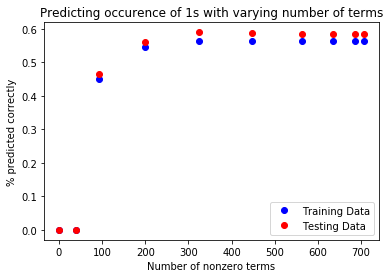

In [95]:
x_axis = np.ones(len(num_zero_list)) *image_size*image_size - num_zero_list
plt.plot(x_axis, np.divide(right_list, sum(labels)), 'ob', label = "Training Data")
plt.plot(x_axis, np.divide(right_test_list, sum(test_labels)), 'or', label= "Testing Data")
plt.xlabel("Number of nonzero terms")
plt.ylabel("% predicted correctly")
plt.legend()
plt.title("Predicting occurence of "+str(int(number))+"s with varying number of terms")
plt.show()

In [21]:
x_axis
print(right_list[-1]/60000)

0.8876333333333334


In [91]:
num_zero, num_right, num_right_test, x = predict_lasso(alpha_list[5], data, labels, test = True)

0.02677797783703919
(784,)


In [92]:
print(num_right/60000)
print(num_right_test/10000)
print(image_size**2 - num_zero)
print(sum(labels))

f = np.matmul(data, x)
print(f.shape)
f_max = np.zeros(len(f))
for i in range(len(f)):
    if(f[i]> 0.5):
        f_max[i] = 1
print(Counter(f_max))
num_right_of_number = find_num_right_of_number(x, data, labels)
print(num_right_of_number)

0.95035
0.9533
325
6742.0
(60000,)
Counter({0.0: 56173, 1.0: 3827})
3795


Text(0.5, 0.98, 'Importance of Each pixel for predicting 1s with various number of nonzero terms')

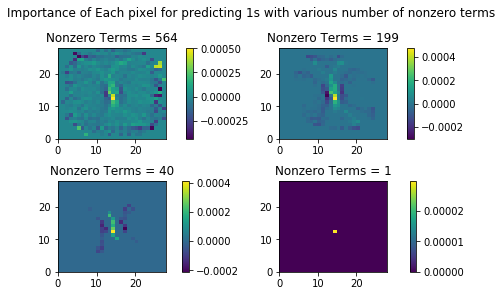

In [36]:
fig, axs = plt.subplots(2, 2,  constrained_layout=True)
i = 3
x = x_list[i]
# normed = norm(x, axis = 1)
box = x.reshape(image_size, image_size)
# x1_norm = norm(x1_box, axis = 2)
c = axs[0,0].pcolor(box)
axs[0,0].set_title("Nonzero Terms = "+str(image_size**2 - num_zero_list[i]))
fig.colorbar(c, ax=axs[0,0])

i = 6
x = x_list[i]
# normed = norm(x, axis = 1)
box = x.reshape(image_size, image_size)
# x1_norm = norm(x1_box, axis = 2)
c = axs[0,1].pcolor(box)
axs[0,1].set_title("Nonzero Terms = "+str(image_size**2 - num_zero_list[i]))
fig.colorbar(c, ax=axs[0,1])

i = 8
x = x_list[i]
# normed = norm(x, axis = 1)
box = x.reshape(image_size, image_size)
# x1_norm = norm(x1_box, axis = 2)
c = axs[1,0].pcolor(box)
axs[1,0].set_title("Nonzero Terms = "+str(image_size**2 - num_zero_list[i]))
fig.colorbar(c, ax=axs[1,0])

i = -1
x = x_list[i]
# normed = norm(x, axis = 1)
box = x.reshape(image_size, image_size)
# x1_norm = norm(x1_box, axis = 2)
c = axs[1,1].pcolor(box)
axs[1,1].set_title("Nonzero Terms = "+str(image_size**2 - num_zero_list[i]))
fig.colorbar(c, ax=axs[1,1])

plt.suptitle("Importance of Each pixel for predicting "+str(int(number))+"s with various number of nonzero terms")
# plt.tight_layout()


In [41]:
#Finding most informative pixels 
i = -1
x = x_list[i]
# normed = norm(x, axis = 1)
box = x.reshape(image_size, image_size)

sort  = (-x).argsort()[:10]
print(sort)

# i = 18
# x = x_list[i]
# normed = norm(x, axis = 1)
# box = normed.reshape(image_size, image_size)

# sort  = (-normed).argsort()[:10]
# print(sort)

# i = 17
# x = x_list[i]
# normed = norm(x, axis = 1)
# box = normed.reshape(image_size, image_size)

# sort  = (-normed).argsort()[:10]
# print(sort)

# print(int(sort[0]/image_size), ", ", sort[0]%image_size)

# np.argmax(box)
# print(np.argmax(normed))

[350   0 517 518 519 520 521 522 523 524]


In [116]:
in_top = np.zeros([image_size*image_size])

for i in range(20):

    x = x_list[i]
    normed = norm(x, axis = 1)
    sort  = (-normed).argsort()[:11]
    for j in sort:
        in_top[j] += 1 / num_zero_list[i]
# box = normed.reshape(image_size, image_size)

In [117]:
print((-in_top).argsort()[:10])
print(in_top[350])
print(in_top[409])
# print(sort)

[350 543 514 378 489 358 409 434 376 405]
0.028757717616775025
0.016820245484103626


350
543
514
378
489
358
409
434
376
405


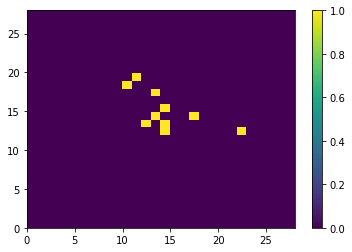

In [121]:
in_top_color = np.zeros([image_size*image_size])
for i in (-in_top).argsort()[:10]:
    print(i)
    in_top_color[i] = 1
    
box = in_top_color.reshape(image_size, image_size)
plt.pcolor(box)
# axs[1,1].set_title("Nonzero Terms = "+str(image_size**2 - num_zero_list[i]))
plt.colorbar()

0.1
0.1
0.2
0.2
0.30000000000000004
0.30000000000000004
0.4
0.4
0.5
0.5
0.6
0.6
0.7000000000000001
0.7000000000000001
0.8
0.8
0.9
0.9
1.0
1.0


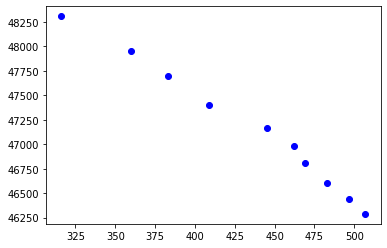

In [60]:
alpha_list_less, right_list_less, num_zero_list_less = many_lasso(10, data, labels)

In [ ]:
plt.plot()

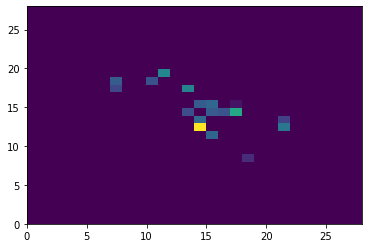

In [54]:
clf = linear_model.Lasso(alpha=10)
clf.fit(data, labels)
x = clf.coef_
x = np.transpose(x)
f, f_max = find_results(data, x)
error, error_max = find_error(data, labels, x)
num_zero = count_num_zero(x)

normed = norm(x, axis = 1)
box = normed.reshape(image_size, image_size)
# x1_norm = norm(x1_box, axis = 2)
plt.pcolor(box)

In [55]:
print(find_num_right(x, data, labels)/len(data))
# print(f_max[0:10])
# print(labels[0:10])

0.26535


In [20]:
# clf = linear_model.Lasso(alpha=0.8)
# clf.fit(data, labels)
x4 = clf.coef_
f4 = clf.predict(data)
error4 = np.linalg.norm(labels - f4, ord=2 )/np.linalg.norm(labels, ord=2)
print(error4)
# x4 = clf.coef_
f4 = np.matmul(data, np.transpose(x4))
error4 = np.linalg.norm(labels - f4, ord=2 )/np.linalg.norm(labels, ord=2)
print(error4)

0.8283162477830476
1.3073113632486302


In [61]:
tup  = np.linalg.lstsq(data, labels)
x1 = tup[0]
f1, f1_max = find_results(data, x1)
error1, error1_max = find_error(data, labels, x)
print(error1)
num_zero = count_num_zero(x1)
num_right = find_num_right(x1, data, labels)
print(num_zero)
print(num_right)
    

C:\Users\16kat\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


0.9812089574670794
14
51117


In [62]:
print(num_right/len(data))

0.85195


(10, 784)


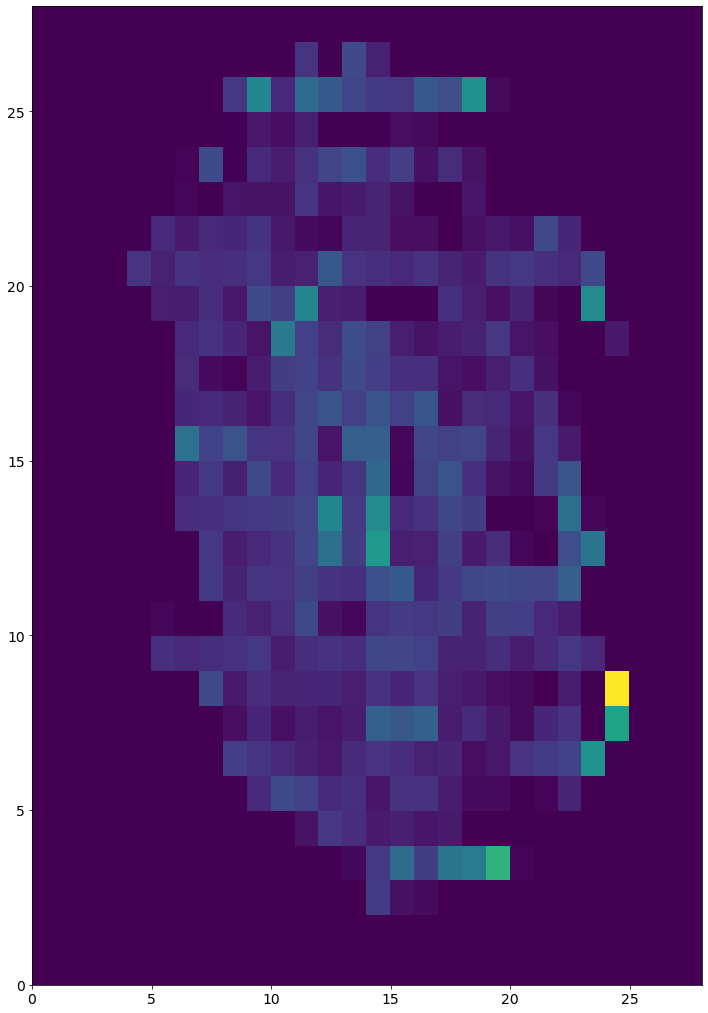

In [149]:
print(x4.shape)
x4_trans = np.transpose(x4)
# print(norm(x4, axis = 0))
normed = norm(x4_trans, axis = 1)
box = normed.reshape(image_size, image_size)
# x1_norm = norm(x1_box, axis = 2)
plt.pcolor(box)


In [222]:
clf = linear_model.Lasso(alpha=0.001)
clf.fit(data, labels)
x5 = clf.coef_
f5 = clf.predict(data)
error5 = np.linalg.norm(labels - f5, ord=2 )/np.linalg.norm(labels, ord=2)
print(error5)

0.7811641636547713


In [179]:
print(data.shape)

(60000, 784)


(10, 784)


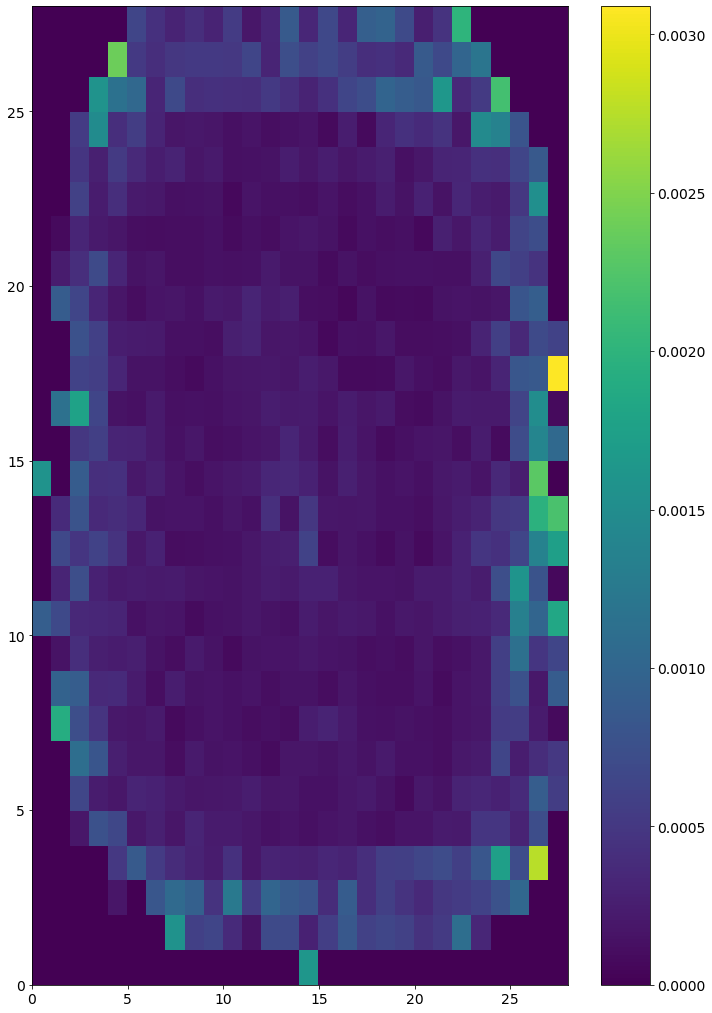

In [223]:
print(x5.shape)
x5_trans = np.transpose(x5)
# print(norm(x4, axis = 0))
normed = norm(x5_trans, axis = 1)
box = normed.reshape(image_size, image_size)
# x1_norm = norm(x1_box, axis = 2)
plt.pcolor(box)
plt.colorbar()

In [231]:
def count_num_zero(x):
    print(len(x))
    num_zero= 0
    for i in range(len(x)):
        if(max(x[i]))==0:
            num_zero += 1
    return num_zero

print(count_num_zero(x5_trans))

784
116


In [229]:
print(x5_trans[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [114]:
#robust and ridge too
ridge = linear_model.Ridge(alpha=1.0).fit(data,labels)
x6 = ridge.coef_
f6 = ridge.predict(data)
error6 = np.linalg.norm(labels-f6,ord=2)/np.linalg.norm(labels,ord=2)

C:\Users\16kat\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.03801e-11): result may not be accurate.
  overwrite_a=True).T


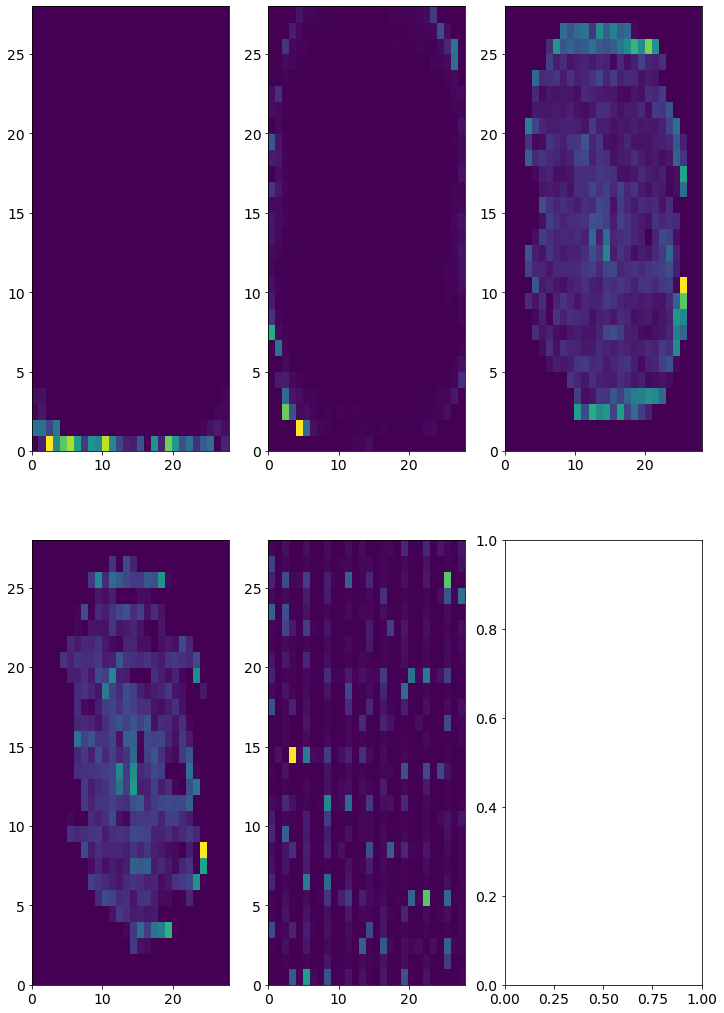

In [150]:
fig, ax = plt.subplots(2, 3)

x1_box = x1.reshape(image_size, image_size,10)
x1_norm = norm(x1_box, axis = 2)
ax[0, 0].pcolor(x1_norm)
# plt.colorbar()

x2_box = x2.reshape(image_size, image_size,10)
x2_norm = norm(x2_box, axis = 2)
ax[0, 1].pcolor(x2_norm)
# ax[0, 1].colorbar()

x3_box = x3.reshape(10, image_size, image_size)
x3_norm = norm(x3_box, axis = 0)
ax[0, 2].pcolor(x3_norm)
# ax[0, 2].colorbar()

x4_box = x4.reshape(10, image_size, image_size)
x4_norm = norm(x4_box, axis = 0)
ax[1, 0].pcolor(x4_norm)
# ax[1, 0].colorbar()

x6_box = x6.reshape(image_size, image_size,10)
x6_norm = norm(x6_box, axis = 2)
ax[1, 1].pcolor(x6_norm)
# ax[1, 1].colorbar()